In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
datos ='/analisisDatos/ventas_sucias.csv'
df = pd.read_csv(datos)
df.head()

,fecha,tienda,producto,unidades,precio
0,2025-01-01,Norte,A,10.0,20.0
1,2025-01-01,Norte,A,10.0,20.0
2,2025-01-02,Norte,B,5.0,NaN
3,2025-01-02,Sur,A,NaN,22.0
4,2025-01-03,Sur,C,8.0,15.5


In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.head()

In [ ]:
print('---- Vista rapida ----')
print(df.head(),'\n')
print('--- Info (tipos y nulos) ---')
print(df.info(), '\n')
print('--- Conteo de Nulos por columnas ---')
print(df.isna().sum(), '\n')
duplicados = df.duplicated().sum()
print(f'--- Filas duplicadas --- \n{duplicados}\n')

---- Vista rapida ----
       fecha tienda producto  unidades  precio
0 2025-01-01  Norte        A      10.0    20.0
1 2025-01-01  Norte        A      10.0    20.0
2 2025-01-02  Norte        B       5.0     NaN
3 2025-01-02    Sur        A       NaN    22.0
4 2025-01-03    Sur        C       8.0    15.5 

--- Info (tipos y nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     10 non-null     datetime64[ns]
 1   tienda    10 non-null     object        
 2   producto  10 non-null     object        
 3   unidades  9 non-null      float64       
 4   precio    9 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 532.0+ bytes
None 

--- Conteo de Nulos por columnas ---
fecha       0
tienda      0
producto    0
unidades    1
precio      1
dtype: int64 

--- Filas duplicadas --- 
3



In [ ]:
df_limpio = df.drop_duplicates().copy()

In [ ]:
mediana_precio_por_producto = df_limpio.groupby('producto')['precio'].transform('median')
df_limpio['precio'] = df_limpio['precio'].fillna(mediana_precio_por_producto)

In [ ]:
print(df_limpio.isna().sum(), '\n')

fecha       0
tienda      0
producto    0
unidades    1
precio      0
dtype: int64 



In [ ]:
df_limpio['unidades'] = df_limpio['unidades'].fillna(0).astype(int)
print(df_limpio.isna().sum(), '\n')

fecha       0
tienda      0
producto    0
unidades    0
precio      0
dtype: int64 



In [ ]:
df_limpio

,fecha,tienda,producto,unidades,precio
0,2025-01-01,Norte,A,10,20.0
2,2025-01-02,Norte,B,5,19.0
3,2025-01-02,Sur,A,0,22.0
4,2025-01-03,Sur,C,8,15.5
6,2025-01-04,Este,B,3,19.0
8,2025-01-05,Oeste,A,12,21.0
9,2025-01-05,Oeste,D,0,30.0


metricas de negocio

In [ ]:
df_limpio['ingreso'] = df_limpio['unidades'] * df_limpio['precio']
df_limpio

,fecha,tienda,producto,unidades,precio,ingreso
0,2025-01-01,Norte,A,10,20.0,200.0
2,2025-01-02,Norte,B,5,19.0,95.0
3,2025-01-02,Sur,A,0,22.0,0.0
4,2025-01-03,Sur,C,8,15.5,124.0
6,2025-01-04,Este,B,3,19.0,57.0
8,2025-01-05,Oeste,A,12,21.0,252.0
9,2025-01-05,Oeste,D,0,30.0,0.0


In [ ]:
resumen_tienda = (df_limpio.groupby('tienda', as_index=False).agg(ingresos_totales=('ingreso', 'sum'),
                                                                  unidades_totales=('unidades', 'sum'),
                                                                  precio_promedio=('precio', 'mean'))
.sort_values('ingresos_totales', ascending=False))
print('--- Resumen por tienda ---')
print(resumen_tienda, '\n')

--- Resumen por tienda ---
  tienda  ingresos_totales  unidades_totales  precio_promedio
1  Norte             295.0                15            19.50
2  Oeste             252.0                12            25.50
3    Sur             124.0                 8            18.75
0   Este              57.0                 3            19.00 



In [ ]:
ingresos = df_limpio['ingreso'].to_numpy()
print('--- Estadisticas de Ingresos ---')
print('min', np.min(ingresos))
print('max', np.max(ingresos))
print('media', np.mean(ingresos))
print('mediana', np.median(ingresos))
print('desv_std:', np.std(ingresos), '\n')

--- Estadisticas de Ingresos ---
min 0.0
max 252.0
media 104.0
mediana 95.0
desv_std: 88.99598706843874 



visualizacion

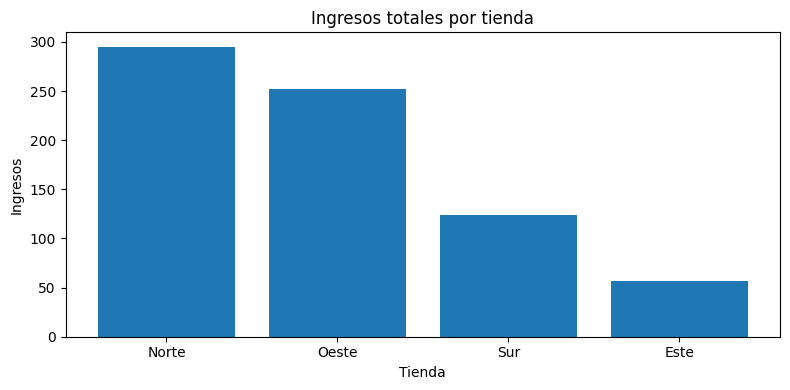

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(resumen_tienda['tienda'],
        resumen_tienda['ingresos_totales'])
plt.title('Ingresos totales por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()

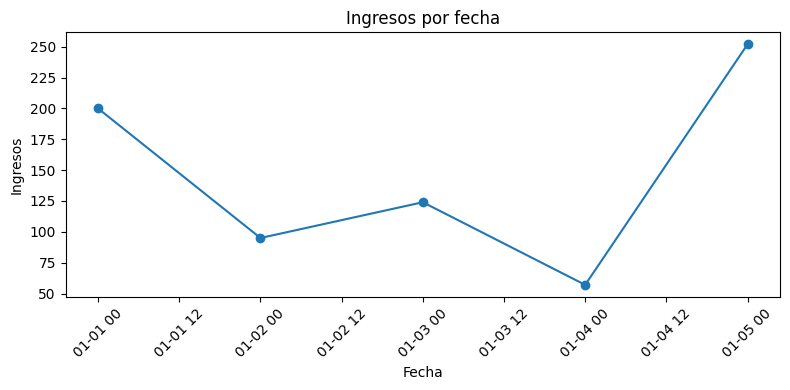

In [ ]:
ingresos_por_fecha = (df_limpio.groupby('fecha', as_index=False)['ingreso'].sum().sort_values('fecha'))
plt.figure(figsize=(8,4))
plt.plot(ingresos_por_fecha['fecha'], ingresos_por_fecha['ingreso'], marker='o')
plt.title('Ingresos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_limpio.to_csv('/analisisDatos/Ventas_limpias.csv', index=False)
!ls /content/drive/MyDrive/analisisDatos/
print("Archivo 'ventas_limpias.csv' guardado.")

'Analisis de datos.ipynb'	    Ventas_limpias.csv
 Untitled0.ipynb		    ventas_sucias.csv
 ventas_electronica_practica.xlsx
Archivo 'ventas_limpias.csv' guardado.
